In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score, roc_curve, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [20]:
# Load Data
x = pd.read_csv("/content/credit_card_applications_dataset.csv")
x.head()
print(x.columns.tolist())


['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Own Car', 'Realty', 'Income Type', 'Family Status', 'Occupation Type', 'Approved']


In [21]:
# Preprocessing Using One Hot Encoding
y = x['Approved']
x = x.drop(columns=['Approved'])
x = x.fillna('Unknown')

categorical_cols = [ 'Industry', 'Ethnicity', 'Citizen', 'Own Car', 'Realty', 'Income Type', 'Family Status', 'Occupation Type']
x = pd.get_dummies(x, columns=categorical_cols, drop_first=True)

x.head(20)

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,...,Own Car_Y,Realty_3BHK,Realty_Bungalow,Realty_Villa,Income Type_Pensioner,Income Type_Working,Family Status_Separated,Family Status_Single,Occupation Type_High skill tech staff,Occupation Type_Laborers
0,1,30.83,0.000,1,1,1.250,1,1,1,0,...,False,False,False,False,False,True,False,True,False,False
1,0,58.67,4.460,1,1,3.040,1,1,6,0,...,False,False,False,False,False,True,False,False,False,False
2,0,24.50,0.500,1,1,1.500,1,0,0,0,...,False,True,False,False,True,False,False,False,False,True
3,1,27.83,1.540,1,1,3.750,1,1,5,1,...,False,False,False,False,False,True,False,True,False,True
4,1,20.17,5.625,1,1,1.710,1,0,0,0,...,True,False,False,False,False,False,False,True,False,False
5,1,32.08,4.000,1,1,2.500,1,0,0,1,...,True,True,False,False,False,True,False,True,True,False
6,1,33.17,1.040,1,1,6.500,1,0,0,1,...,True,False,False,False,False,False,False,False,False,True
7,0,22.92,11.585,1,1,0.040,1,0,0,0,...,False,True,False,False,False,True,False,False,False,True
8,1,54.42,0.500,0,0,3.960,1,0,0,0,...,False,False,False,False,True,False,True,False,False,True
9,1,42.50,4.915,0,0,3.165,1,0,0,1,...,False,False,False,False,False,True,False,True,False,True


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Logistic Regression model parameters ---
Accuracy of the Logistic Regression Model:  0.7971014492753623

Confusion Matrix:
 [[51  9]
 [19 59]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81        78
           1       0.73      0.85      0.78        60

    accuracy                           0.80       138
   macro avg       0.80      0.80      0.80       138
weighted avg       0.81      0.80      0.80       138



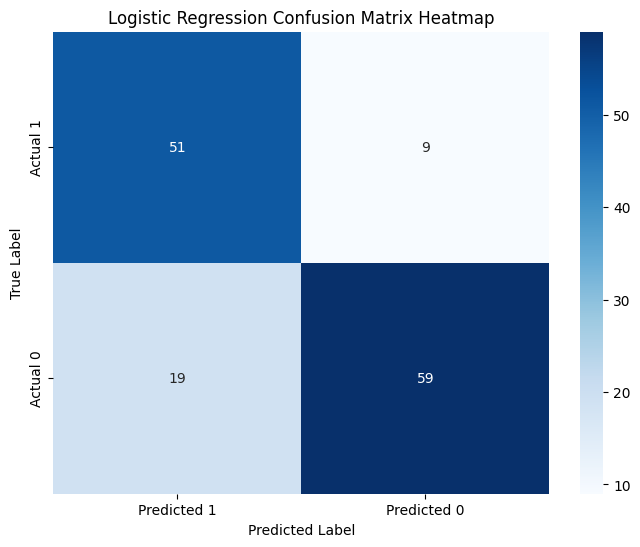

In [22]:
# Logistic Regression model

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=100)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_valid)

accuracy = accuracy_score(y_valid, y_pred)
print('--- Logistic Regression model parameters ---')
print("Accuracy of the Logistic Regression Model: ", accuracy)

confusion = confusion_matrix(y_valid, y_pred, labels=[1, 0])
print('\nConfusion Matrix:\n', confusion)

report = classification_report(y_valid, y_pred)
print('\nClassification Report:\n', report)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 1', 'Predicted 0'],
            yticklabels=['Actual 1', 'Actual 0'])

plt.title('Logistic Regression Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


--- Linear Regression model parameters ---
Mean Squared error: 0.15
Variance score (R2): 0.40


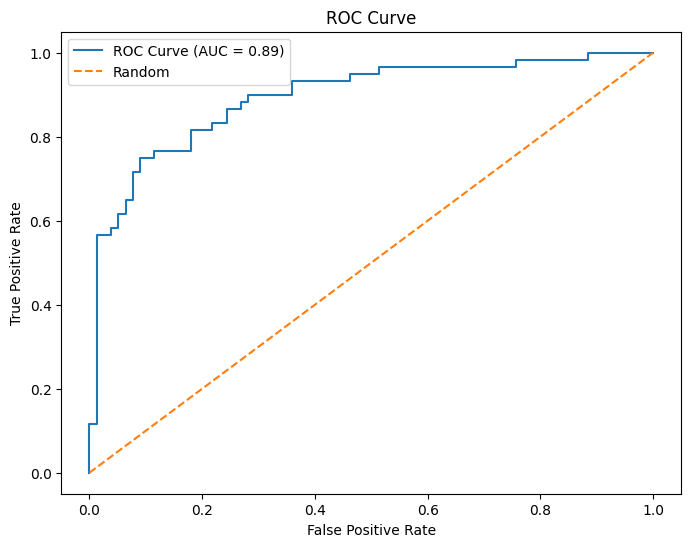

In [23]:
# Linear Regression model
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.3, random_state=42)

# Scaling
scaler = preprocessing.StandardScaler()
# Fit on train, transform both
scaler.fit(x_train2)
x_train2_scaled = scaler.transform(x_train2)
x_test2_scaled = scaler.transform(x_test2)

# Training
regressor = LinearRegression()
regressor.fit(x_train2_scaled, y_train2)

# Prediction
y_pred2 = regressor.predict(x_test2_scaled)

# Evaluation
print('\n--- Linear Regression model parameters ---')
print('Mean Squared error: %.2f' % mean_squared_error(y_test2, y_pred2))
print('Variance score (R2): %.2f' % r2_score(y_test2, y_pred2))

# --- 5. ROC Curve ---
y_proba = logreg.predict_proba(x_valid)[:, 1]
fpr, tpr, thresholds = roc_curve(y_valid, y_proba)
auc = roc_auc_score(y_valid, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()